In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#https://www.kaggle.com/c/ieee-fraud-detection/data
#load training data
train_transaction = pd.read_csv('train_transaction.csv')
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_identity = pd.read_csv('train_identity.csv')
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [15]:
tarin_data = train_transaction.join(train_identity.set_index('TransactionID'), on='TransactionID')
tarin_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [16]:
tarin_data.shape

(590540, 434)

In [12]:
#numerical features
num_features = ['TransactionDT',  'TransactionAmt']
num_features = num_features + ['C%d' % number for number in range(1, 15)]
#num_features = num_features + ['D%d' % number for number in range(1, 16)]
#num_features = num_features + ['V%d' % number for number in range(1, 340)]
#num_features = num_features + ['Id_%d' % number for number in range(1, 12)]
print(", ".join(num_features))
len(num_features)

TransactionDT, TransactionAmt, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14


16

In [13]:
cat_features = ['ProductCD',  'DeviceType', 'DeviceInfo', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain']
cat_features = cat_features + ['card%d' % number for number in range(1, 7)]
cat_features = cat_features + ['M%d' % number for number in range(1, 10)]
cat_features = cat_features + ['Id%d' % number for number in range(12, 39)]
print(", ".join(cat_features))
len(cat_features)

ProductCD, DeviceType, DeviceInfo, addr1, addr2, P_emaildomain, R_emaildomain, card1, card2, card3, card4, card5, card6, M1, M2, M3, M4, M5, M6, M7, M8, M9, Id12, Id13, Id14, Id15, Id16, Id17, Id18, Id19, Id20, Id21, Id22, Id23, Id24, Id25, Id26, Id27, Id28, Id29, Id30, Id31, Id32, Id33, Id34, Id35, Id36, Id37, Id38


49

In [20]:
rows=10000
data = tarin_data.loc[:rows, :]

In [21]:
#features
X = data.loc[:, num_features]

In [22]:
#labels
y = data.loc[:, "isFraud"]

In [23]:
y.value_counts()

0    9736
1     265
Name: isFraud, dtype: int64

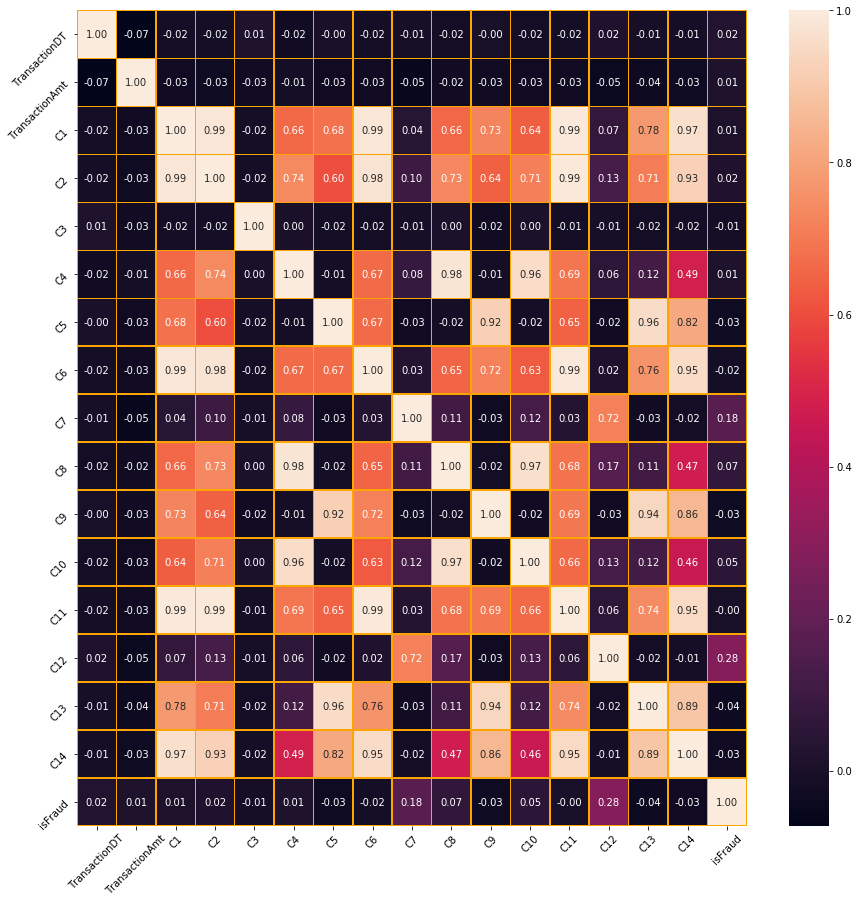

In [32]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data.loc[:, num_features].corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
y_pred = model.predict(X_test)

In [29]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2915
           1       0.89      0.09      0.17        86

   micro avg       0.97      0.97      0.97      3001
   macro avg       0.93      0.55      0.58      3001
weighted avg       0.97      0.97      0.96      3001



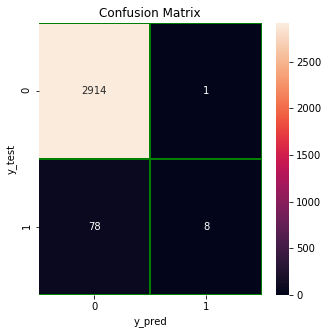

In [34]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix")
plt.show()